![Welcome IO Quantum 101 Image](../images/WelcomeIOQuantum101Image.png)


# **Lab 01 - Building "Hello Quantum" Programs with Qiskit**

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">  
Welcome to the very first IO Quantum Summer School at IO Scholar Community 🙋🏻‍♂️.
<br>
  
This program has been thoughtfully designed to provide you with a foundational understanding of Quantum Computing as a whole, with a particular focus on how to design and implement quantum algorithms and basic applications. Throughout the course, you will explore core principles of quantum computation, quantum algorithms, and the process of modeling real-world problems for quantum solutions.

Each lab exercise in this program has been carefully developed to help you apply the concepts introduced in the reading materials and lectures provided through our academic community and online platform on Circle. These hands-on sessions aim to bridge theory and practice, ensuring that your learning experience is both comprehensive and grounded in real-world quantum programming.

</div>

## **Note Before You Begin**

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   
To ensure a smooth experience working through the labs of the IO Quantum Summer School, you will be provided with Jupyter notebook files—like the one you're currently viewing. These notebooks contain code cells that guide you through each step. Some of these cells are pre-filled with specific code; we kindly ask that you do not modify those predefined cells. Instead, you’ll be writing your own code in the designated areas, indicated with a comment like: <span style="font-family: monospace; font-weight: bold; color:#000; background-color: #fff8dc; padding: 2px 6px; border-radius: 4px;">
  ### WRITE YOUR CODE BELOW THIS CELL ###
</span>.
  
One light-hearted but important note: if you restart the kernel, make sure to re-run all the code cells in order from top to bottom. Although most cells can be run multiple times, some—such as the ones for installing Qiskit—should generally be run only once. Just make sure that the cells above are always executed before the ones below.
  
On a related note, we would also like to mention the execution of quantum programs on IBM’s quantum hardware, which is accessible via their cloud platform. Unfortunately, due to regional restrictions, we are currently unable to legally access IBM’s cloud services from our location. As a result, we will be running quantum simulations locally, using the computational resources of your own laptop. No worries—this works perfectly well for the purposes of this lab!

We hope this will be an exciting experience as you take your first steps into the world of quantum programming!

**Lab 01** will primarily focus on setting up your local environment to ensure your quantum programs can run smoothly. Additionally, you'll be given an overview of how to build your very first quantum program. Finally, you'll experiment with Qiskit templates to construct a quantum circuit that generates a truly random number—your first hands-on encounter with quantum randomness!

</div>

## **Install Qiskit**
  
<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   
Qiskit is an open-source software development kit for programming quantum computers, built on the Python programming language. Developed by IBM, Qiskit can be considered a high-level programming interface for constructing quantum programs. These programs are then compiled and executed on IBM's quantum hardware, which is accessible through their cloud platform. Additionally, Qiskit provides extensions that allow users to simulate quantum programs using classical computing resources. Additional resources can be found at <a href="https://quantum.cloud.ibm.com/docs/en/guides" target="_blank" style="color: #1d73e4ff; text-decoration: none; font-weight: bold;"> IBM Quantum Documentation</a>.

Make sure your laptop has Python installed. Next, we need to create a virtual environment, which separates your projects and quantum programs to avoid unnecessary conflicts. We recommend two ways to create a new virtual environment. You can find more details below:

1. Using venv, see more information <a href="https://docs.python.org/3/library/venv.html" target="_blank" style="color: #1d73e4ff; text-decoration: none; font-weight: bold;">here</a>. For example, to create the environment named `ioq` using venv, run `python -m venv ioq` in your terminal and the activate it by `source ioq/bin/activate`

3. Using Conda, see more information <a href="https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html" target="_blank" style="color: #1d73e4ff; text-decoration: none; font-weight: bold;">here</a>.
</div>

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   

Now, we will begin installing Qiskit along with other essential packages needed for quantum programming and data visualization.
**Note**: The first time you run the following code blocks in VS Code, you may see a prompt similar to the one shown below. Simply click Install when prompted.

<img src="../images/RunningCellwithVenv.png" alt="VS Code install prompt example" style="display: block; margin-left: auto; margin-right: auto; width: 15%; border: 1px solid #ccc; border-radius: 8px;">
</div>

In [ ]:
!pip install -r requirements.txt

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   
To verify that Qiskit has been installed successfully, you can check the currently installed version of Qiskit.
</div>

In [ ]:
import qiskit
print(f"Qiskit version: {qiskit.__version__}")

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   

Next, an important step we need to take is to prepare everything for the **quantum simulator**, which we’ll be using throughout the lab sessions of the IO Quantum Summer School. A special feature of the simulators in this program is that they realistically emulate the current quantum devices provided by IBM Quantum. This means our simulators include **noise** and **errors**, which makes them very useful for running quantum programs through simulation. Below, I’ve provided a sample code snippet to help you set up the simulator properly.

</div>

In [ ]:
# Import some necessary libraries for the quantum simulator
import qiskit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeHanoiV2

In [ ]:
fake_backend = FakeHanoiV2()
# Quantum simulation backend for noise simulation
backend_simulator = AerSimulator.from_backend(fake_backend)

## **First Quantum Program: Introduction to Single-Qubit Gates**


In [ ]:
# Import some necessary libraries (already included the ones above).
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   

At this point, everything is ready for our first quantum program. In this section, we will demonstrate the application of several quantum gates on a single-qubit system and observe the state of the quantum circuit after performing measurement.

Note: In Qiskit, by default, qubits are initialized in the state 0

Recall that applying a quantum gate to a qubit is mathematically represented as multiplying a matrix by a vector. This can be expressed as follows:
    <div style="text-align: center;"> 
    $X \ket 0 = \ket 1$,  $\space$  where $X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$
    </div>

Below is a sample program provided to give an overview of how a quantum program actually works, specifically to illustrate the application of a quantum gate—in this case, the NOT gate (or X-gate)—to a qubit initially in the $\ket 0$ state.


</div>

In [ ]:
# Creating quantum registers, classical registers and quantum circuit
Quantum_Register = QuantumRegister(1, 'Qubit') 
Classical_Register = ClassicalRegister(1, 'Classical Bit') 
qc = QuantumCircuit(Quantum_Register, Classical_Register)

# Applying an X gate to a qubit to alter its state
qc.x(Quantum_Register[0])
qc.measure(Quantum_Register[0], Classical_Register[0])

qc.draw("mpl")

In [ ]:
# RUN THE QUANTUM CIRCUIT ON A NOISELESS SIMULATION BACKEND

# Initialize the quantum backend simulator
backend_simulator = AerSimulator()

# Compiling an abstract-level quantum circuit into a form compatible with quantum hardware
transpiled_qc = transpile(qc, backend_simulator)

# Running the transpiled circuit on the simulator backend
result_x = backend_simulator.run(transpiled_qc, shots=1024).result()

# Collecting output data after simulating the quantum circuit
counts = result_x.get_counts()

plot_histogram(counts, title='Measurement counts after applying H gate to |0⟩ state (ideal, no noise)')

In [ ]:
# RUN THE QUANTUM CIRCUIT ON A NOISY SIMULATED BACKEND

# Initialize the quantum backend simulator
fake_backend = FakeHanoiV2()
backend_simulator = AerSimulator.from_backend(fake_backend)

# Compiling an abstract-level quantum circuit into a form compatible with quantum hardware
transpiled_qc_noisy = transpile(qc, backend_simulator)

# Running the transpiled circuit on the simulator backend
result_x = backend_simulator.run(transpiled_qc_noisy, shots=1024).result()

# Collecting output data after simulating the quantum circuit
counts = result_x.get_counts()

plot_histogram(counts, title='Measurement counts after applying X gate to |0⟩ state (with noise)')

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   

It is encouraging to obtain such results. As we can observe from the two charts, the ideal (noise-free) simulation yields, after $1024$ measurements, exactly $1024$ outcomes of one. Unfortunately, current quantum hardware is still imperfect, with a certain rate of errors and noise. Consequently, in the noisy simulation, we can observe the appearance of a few zero outcomes in the chart. Nevertheless, the results from both charts demonstrate that the quantum state has been transformed from $\ket 0$ to $\ket 1$.
</div>

## **Quantum Approach to Generating Truly Random Integers**

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify; color: #000; background-color: #fff8dc; padding: 15px; border-radius: 8px;">   

Problem Statement:
Develop a hybrid quantum-classical program to generate a truly random integer. The integer should be uniformly distributed within the range $[0,2^n−1]$, where $n$ represents the number of bits.

**Requirements:**

- The program must leverage quantum principles to ensure true randomness, as opposed to pseudo-random generation.

- The output should be an integer strictly less than $2^n$

**Input:**          
- $n$ (int): The number of bits used to represent the random integer.

**Output:**  
- An integer in the range $[0,2^n−1]$, generated through a quantum process.
</div>

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   

The main idea of this program is to **leverage the quantum superposition** of a qubit and the **intrinsic randomness of quantum mechanics** to create a program that generates truly random numbers. This concept can be illustrated as follows:
</div>

<img src="../images/SolutionRandomNumber.png" alt="VS Code install prompt example" style="display: block; margin-left: auto; margin-right: auto; width: 65%; border: 1px solid #ccc; border-radius: 8px;">

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   

**The four steps when applying a quantum approach to solve a specific problem are as follows:**

1. Map the problem to quantum circuits and operators

2. Optimize for the target hardware

3. Execute on the target hardware

4. Post-process the results
</div>

### **Step 1 - Map the problem to quantum circuits and operators**

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   

As has been approached with this, quantum superposition is simply understood as the simultaneous existence of two states, $0$ and $1$, at the same time, which is expressed mathematically as follows: $\ket \psi = \alpha \ket 0 + \beta \ket 1$. In quantum mechanics in general, and in quantum computing in particular, the creation of quantum superposition can be readily achieved by applying the **Hadamard Gate**, which is mathematically represented as follows:
    <div style="text-align: center;"> 
    $H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$
    </div>

The quantum superposition state obtained after applying a Hadamard gate to a qubit initially in the $\ket 0$ state is called ket-plus $\ket \psi$ and is mathematically represented as follows:
    <div style="text-align: center; font-size: 19px;"> 
    $\ket + = \frac{\ket 0 + \ket 1}{\sqrt{2}} $
    </div>

</div>

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify; color: #000; background-color: #fff8dc; padding: 15px; border-radius: 8px;">   

**Exercise 1: Design a Superposition state**
  
In this exercise, you will design a quantum superposition state by following these steps:
1. **Create a quantum circuit** with quantum registers initialized to their default state.
2. **Apply the Hadamard gate** to the first qubit.
3. **Apply a Measurement operation** on that same qubit.

</div>

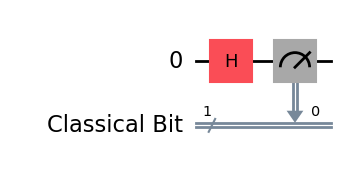

In [ ]:
QReg = QuantumRegister(1, '0') 
CReg = ClassicalRegister(1, 'Classical Bit') 

### WRITE YOUR CODE BELOW THIS CELL ###
# Create a quantum circuit with the quantum and classical registers
qc = 
# Apply the Hadamard gate to create superposition

# Measure the qubit and store the result in the classical register


### YOUR CODE FINISHES HERE ###

qc.draw("mpl")

### **Step 2 - Optimize for the target hardware**

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   

After designing our quantum circuit, it works as expected!

The next step is to compile the quantum circuit into a form that can run efficiently on actual quantum hardware. The circuit we designed above is an abstract representation, and real quantum hardware sometimes does not support certain gates present in our design (for example, the Hadamard gate). Therefore, it is necessary to perform circuit compilation, which maps the abstract circuit to an equivalent one using only the gates supported by the target hardware.
</div>

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify; color: #000; background-color: #fff8dc; padding: 15px; border-radius: 8px;">   

**Exercise 2: Quantum Circuit Compilation**
  
In this exercise, you need to initialize the quantum simulator and compile the corresponding circuit by following these steps:
1. Create the quantum backend simulator
2. Compile the quantum circuit for the corresponding quantum hardware
</div>

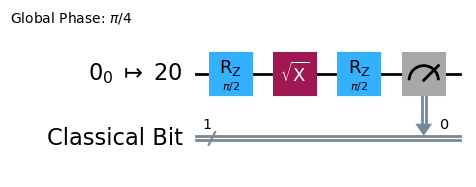

In [ ]:
fake_backend_HaNoi = FakeHanoiV2()

### WRITE YOUR CODE BELOW THIS CELL ###
# Initialize the simulator backend using the fake backend
backend = 
# Compile the quantum circuit to be compatible with the hardware
transpiled_qc = 
### YOUR CODE FINISHES HERE ###

transpiled_qc.draw("mpl")

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   

Here, you can see that after compiling the circuit, the Hadamard gate has been decomposed into a set of quantum gates that are supported by the quantum hardware. Another point to note is that the qubit in our circuit is now mapped to qubit $112$ on the actual quantum hardware.
</div>

### **Step 3 - Execute on the target hardware**

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   

After creating the quantum circuit, preparing the quantum simulator, and compiling the circuit to optimize it for the target quantum hardware, the next step is to execute the quantum circuit and extract classical information from it.
</div>

In [66]:
def quantum_exec(transpiled_qc, backend, shots=1):
    """
    Executes a quantum circuit and returns a single random measurement outcome (0 or 1).

    The function simulates the collapse of a qubit into one of the basis states using
    the specified backend. It runs the quantum circuit, retrieves execution results,
    and extracts one outcome from the measurement memory.

    Steps:
        - .run(): Executes the quantum circuit on the specified backend.
        - .result(): Retrieves the result object containing the execution outcome.
        - .get_memory(): Returns a list of bitstrings from all shots.

    Returns:
        int: A single integer value (0 or 1) obtained from the measurement.
    """
    # Execute the compiled quantum circuit on the quantum backend and store the result
    job = backend.run(transpiled_qc, shots=shots, memory = True)
    # Get the results
    result = job.result()
    # get_memory(): Returns a list of bitstrings from executions, for example: ['0', '1', '0', '1', '0', ...] # 1,024 elements.
    random_number = result.get_memory()
    return int(random_number[0])

print(f"The result obtained after executing the quantum circuit: {quantum_exec(transpiled_qc, backend)}")

The result obtained after executing the quantum circuit: 1


### **Step 4 - Post-process the results**

<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   

The final step is to process the classical information obtained from the execution of the quantum circuit. According to the problem requirements, we need to generate a truly random number with a maximum possible value of $2^n$ , where $n$ represents the number of bits.
</div>

In [ ]:
def classical_process(n):
    """
    Generates a quantum random integer by collecting n bits from quantum measurements.

    Args:
        n (int): The number of bits to generate.

    Returns:
        int: An integer converted from the n-bit random bitstring.
    """
    bitstring = ""
    # Repeat the call to quantum_exec() n times to construct a random bitstring from individual random values
    for _ in range(n):
        bit = quantum_exec(transpiled_qc, backend) 
        bitstring += str(bit)
    return int(bitstring, 2)

In [80]:
n = 10  # Number of bits to generate
print(f"A quantum random number with {n} bits: {classical_process(n)}")

A quantum random number with 10 bits: 928


## **Congratulations!**


<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   

Congratulations on completing the first lab of the IO Quantum Summer School 2025!

In this lab, we successfully laid a foundation for the upcoming quantum programs. We set up the environment, installed Qiskit and the necessary packages, and explored how a real quantum program operates by designing a hybrid quantum-classical program to generate a truly random number.

Next, we will move on to Lab 2: Multi-Qubit Circuits and Entanglement in Action.
</div>

## **Additional information**




<div style="font-family: 'Arial'; font-size: 16px; line-height: 1.6; text-align: justify;">   

**Created by**: An Phan
  
**Advised by**: Hoa Nguyen
</div>